In [44]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

#propriedades do problema
N = 50
minimum_global = -20
F = 0.8
C = 0.7
C1 = 1
C2 = 1
W = 0.5
vmax = 1


---
<h3> Rastrigin Function </h3>

In [45]:
def rastrigin(x):  # objective function
    x = x.reshape(1, -1).T
    Q = np.eye(len(x))
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_15340/3156458275.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


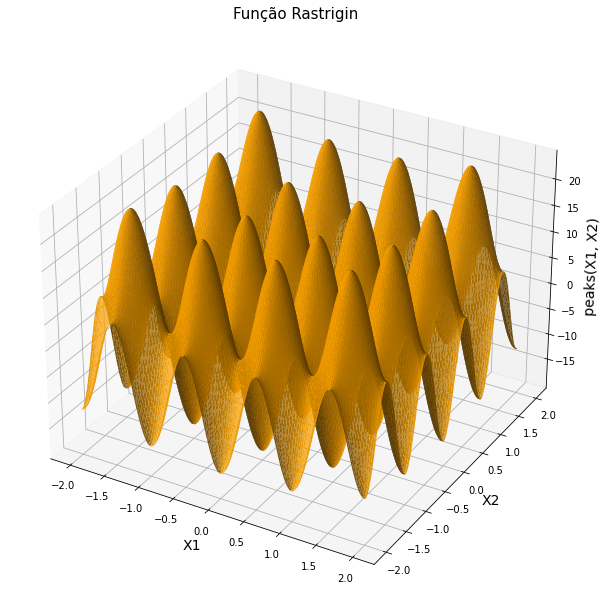

In [46]:
x1 = x2 = np.linspace(-2, 2, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
# IMPLEMENTAÇÃO


In [47]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop(pop, velocidades):

    for c in range(0,N):                                                        # laço para gerar os N indivíduos e suas velocidades
        individuo = []                                                              # lista auxiliar para gerar 1 elemento indivíduo
        velocidade = []                                                             # lista auxiliar para gerar 1 elemento velocidade
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))                  # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))                  # gera a coordenada x2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        pop.append(individuo[:])                                                    # adiciona o individuo na população
        velocidades.append(velocidade[:])
        

In [48]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = []
velocidades_teste = []
initPop(pop_teste, velocidades_teste)
print(f'população teste: {pop_teste}\n')
print(f'vetor velocidade: {velocidades_teste}')

população teste: [[-1.5856, -0.8534], [1.379, 1.4655], [-0.8445, 1.9527], [-1.3193, 0.586], [0.9708, -1.585], [-0.2837, -1.4315], [0.6484, -0.7962], [0.5922, 1.6329], [1.0135, 0.2777], [-1.6397, -0.6389], [1.0738, -0.9935], [-1.0734, 0.5549], [0.0758, -0.4501], [1.8398, -1.326], [-1.2412, -1.0921], [0.3167, -1.5712], [-1.1284, -0.6125], [-0.0659, -0.7486], [-0.2356, -1.1922], [1.3442, -0.0411], [-0.058, 0.7181], [-1.4029, 0.3732], [-1.0354, -0.1944], [-1.245, -0.6701], [-0.0127, 1.1789], [-1.507, 1.9888], [-1.2533, -1.028], [1.4043, 0.2595], [0.5225, -0.524], [0.8017, -0.2355], [-1.1633, 1.3795], [-1.4287, 0.5364], [1.8831, -0.0075], [-0.9676, -0.0266], [-0.4552, 1.3319], [-1.9324, -0.2905], [-0.9278, -0.9953], [-1.3771, 1.244], [0.4272, 0.5887], [-1.1866, -0.6829], [-0.5373, 1.3114], [1.6697, 1.8024], [-0.325, 0.7152], [1.683, -0.9914], [1.0221, -0.4561], [-0.5623, 0.2094], [0.3891, -0.8467], [1.4414, -0.265], [-0.9613, 0.1907], [-0.3553, -0.9626]]

vetor velocidade: [[0.99, 0.97], [-

In [49]:
#BLOCO 4: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):                
    ar = np.array(individuo)                                    #converte a lista individuo para array
    return float("{:.4f}".format(rastrigin(ar)))                #calcula o f(x) do individuo apartir da função rastringin

In [50]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

5.7813


In [51]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                                                #cria uma lista para armazenar o fitness da população   
    for c in range(0,N):                                                            #laço para analisar os N individuos
        fitness_ind = calcula_f_de_x(pop[c])                                            #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                                                 #coloca o fitness na lista
    return pop_fitness

In [52]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[5.7813, 21.0618, -10.6302, 14.8772, 2.2299, 13.3193, 4.151, 18.097, -7.1281, 15.9129, -16.7956, 1.9158, 0.8337, 4.3913, -6.1912, 15.6542, 2.3341, -8.5022, -2.9791, -2.2807, -6.8333, 17.294, -12.0666, 6.497, -12.8984, 6.2415, -7.0108, 10.882, 20.3343, -3.4032, 5.3424, 21.0817, -13.8644, -18.7172, 16.5094, -2.7756, -17.1328, 10.2308, 17.9878, 2.0876, 15.498, 7.6374, 7.3262, -2.0836, 0.971, 7.0802, 2.8284, 12.4187, -12.3857, -2.5284]


In [53]:
#BLOCO 8: CALCULANDO A NOVA POSIÇÃO DO INDIVÍDUO
def movimentacao(individuo, velocidade):
    individuo[0] = individuo[0] + velocidade[0]                 #calcula a posição final do individuo na coordenada x1
    individuo[1] = individuo[1] + velocidade[1]                 #calcula a posição final do individuo na coordenada x2
    for c in range(0,2):                                        #laço para analisar as suas coordenadas do individuo
        if individuo[c] > 2:                                        #confere se houve um extrapolamento positivo da coordenada 
            reflexao = individuo[c] - 2                                 #em caso positivo, calcula a reflexão 
            individuo[c] = 2 - reflexao                                 #aplica a reflexão
        if individuo[c] < -2:                                       #confere se houve um extrapolamento negativo da coordenada
            reflexao = (individuo[c] + 2)                               #em caso positivo, calcula a reflexão
            individuo[c] = -2 - reflexao                                #aplica a reflexão

    

In [54]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA

#COM REFLEXÃO:
pos_teste = [1.9, -1.4]
velocidade_teste  = [1, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')
print('-'*20)

#SEM REFLEXAO:
pos_teste = [1, -0.5]
velocidade_teste  = [0.5, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')


Posição inicial: [1.9, -1.4] | Velocidade: [1, -0.7]
Posição final: [1.1, -1.9000000000000004]
--------------------
Posição inicial: [1, -0.5] | Velocidade: [0.5, -0.7]
Posição final: [1.5, -1.2]


In [55]:
#BLOCO 10: ATUALIZANDO O W 
def atualizaW(t):
    w = 0.7 - ((0.7-0.3)/15)*t                              # formula para atualizar o W
    
    if w > 0.7:                                             #se passar do valor maximo, W vira 0.7
        w = 0.7
    
    elif w< 0.3:                                            #se passar do valor minimo, W vira 0.3
        w = 0.3
    
    return w



In [56]:

try: 
    def grafico(pop, t):

        fig, ax = plt.subplots() 

        min = [0, 0]

        curves = ax.tricontour(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p])
        plt.scatter(min[0], min[1], color='red', s = 100)
        for c in range(0,N):
            plt.scatter(pop[c][0],pop[c][1], color='blue')                              #plota o gráfico com as duas listas

        plt.xlim((-2,2))
        plt.ylim((-2,2))

        ax.set_title(f'Geração {t}', fontdict={'fontsize':15})
        ax.set_xlabel('X1', fontdict=font_labels)
        ax.set_ylabel('X2', fontdict=font_labels)
        plt.show()                                                  #mostra o gráfico
except:
    print('Erro ao criar função "def grafico(geracoes,bests):"!')

Melhor indivíduo inicial: [-0.0428, 0.9858]; Minímo da população: -18.6272


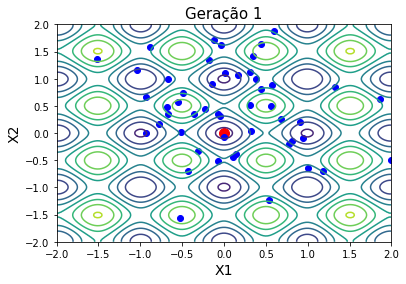

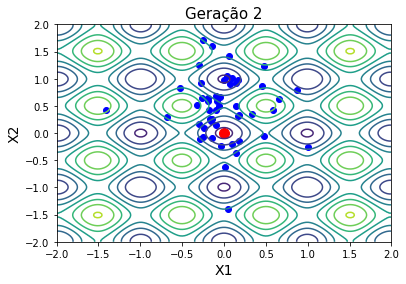

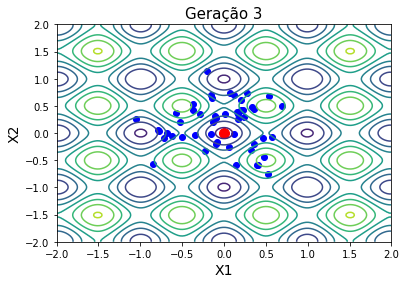

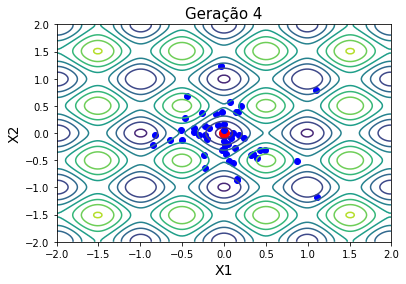

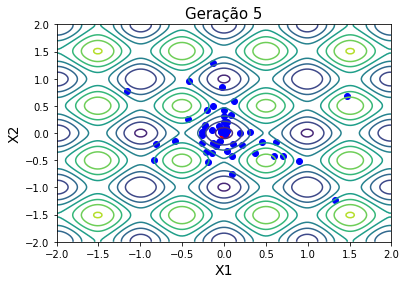

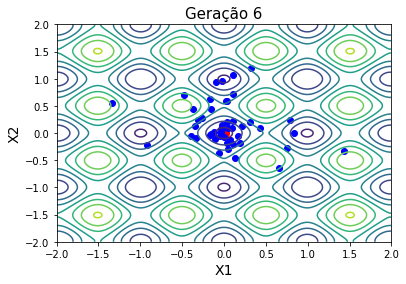

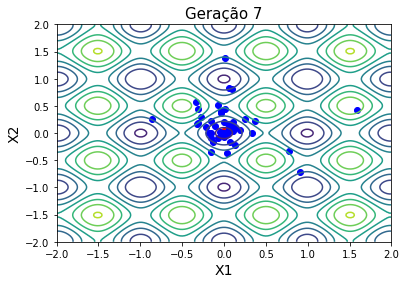

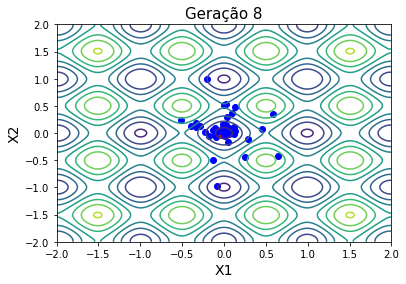

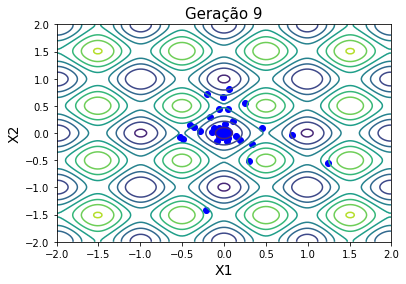

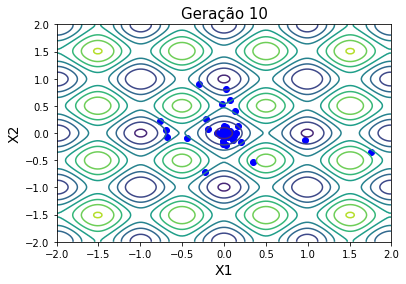

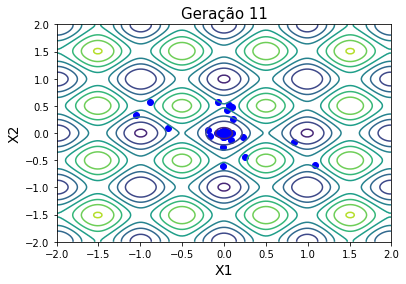

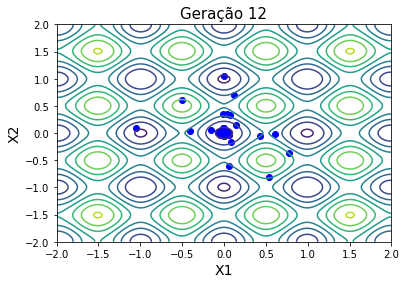

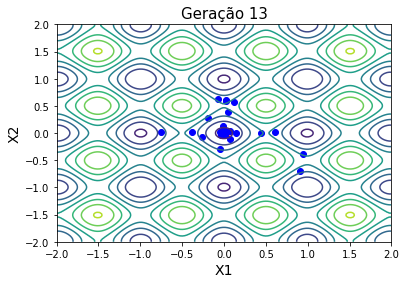

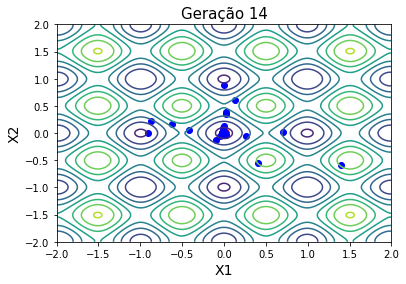

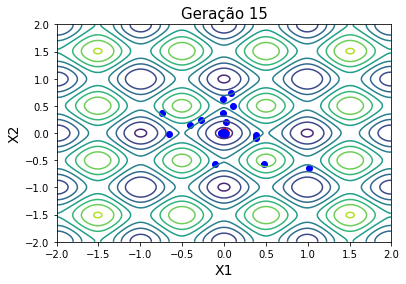

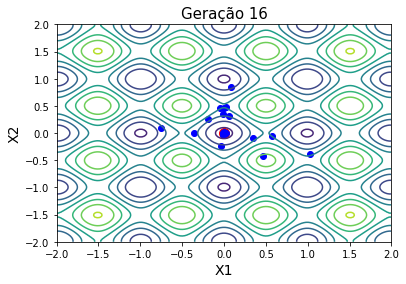

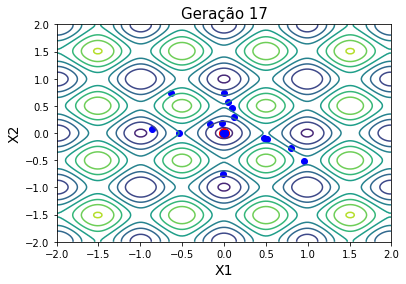

GERAÇAO FINAL:  18
Posição do melhor indivíduo final: [0.001, 0.001]; 

Minímo da população: -20.0 



In [57]:
#BLOCO 11: BLOCO PRINCIPAL

## inicialização da população
pop = []                                                                                                #lista para armazenar a população 
velocidades = []                                                                                        #lista para armazenar as velocidades
pbest = []                                                                                              #lista para armazenar a melhor posição de cada particula
minimos = []                                                                                            #lista para armazenar o melhor f(x) de cada particula
pg = []                                                                                                 #lista para armazenar a melhor posição já encontrada

initPop(pop, velocidades)                                                                               #cria a população e as velocidades iniciais
pop_fitness = popfitness(pop)                                                                           #analisa o fitness da população
best = min(pop_fitness)                                                                                 #descobre o melhor f(x) da população inicial
pos_best = pop_fitness.index(best)                                                                      #descobre a posição do melhor individuo

pbest = pop[:]                                                                                          #preenche 'pbest' na geração inicial
minimos = pop_fitness[:]                                                                                #preenche 'minimos' na geração inicial

pg = (pop[pos_best])                                                                                    #preenche o pg na geração inicial
t = 1                                                                                                   #contador de gerações                          

print(f'Melhor indivíduo inicial: {pg}; Minímo da população: {best}')

while best != minimum_global:                                                                           #laço até encontrar a solução perfeita
                                                                                                 
    for c in range(0,N):                                                                                #laço que percorre todos os indivíduos
        if(calcula_f_de_x(pop[c]) < minimos[c]):                                                            #compara o f(x) de cada individuo da população atual com os da lista minimos
            minimos[c] = calcula_f_de_x(pop[c])                                                                 #caso, o individuo da população atual seja melhor, atualiza minimos
            pbest[c] = pop[c]                                                                                   #também salva a posição dele em pbest
        best = min(minimos)                                                                                 #descobre o melhor f(x) da geração
        pos_best = minimos.index(best)                                                                      #descobre a posição do melhor individuo
        pg = pbest[pos_best]                                                                                #atualiza pg
        
        individuo = []
        individuo.append(pop[c][0])              
        individuo.append(pop[c][1])                                                                         #lista auxiliar para armazenar um individuo da população
        for d in range(0,2):                                                                                #laço para ambas dimensoes do problema
            P1 = rd.random()
            P2 = rd.random()
            t1 = P1*C1
            t2 = P2*C2
            vel = W*velocidades[c][d] + t1*(pbest[c][d] - individuo[d]) + t2*(pg[d] - individuo[d])                 #calcula uma coordenada do vetor velocidade do individuo
            if(vel>vmax):                                                                                           #confere se a velocidade eh maior do que a permitida no problema
                vel = vmax                                                                                                  #altera a velocidade para o valor máximo, caso positivo
            elif(vel<-vmax):                                                                                        #confere se a velocidade eh menor do que a permitida no problema
                vel = -vmax                                                                                                 #altera a velocidade para o valor minimo, caso positivo
            velocidades[c][d] = vel                                                                                 #atualiza uma coordenada do vetor velocidade do individuo
        
        movimentacao(individuo, velocidades[c])                                                                     #movimenta o individuo
        pop[c] = individuo[:]                                                                                       #atualiza a população

    W = atualizaW(t)
    grafico(pop, t)
    t = t + 1                                                                                               #incrementa a geração 
    
                                                                                                                                          
#formatando o individuo                                                        
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))

print('GERAÇAO FINAL: ', t) 
print(f'Posição do melhor indivíduo final: [{pop[pos_best][0]}, {pop[pos_best][1]}]; \n')
print(f'Minímo da população: {best} \n')



# **RELATÓRIO EVOLUÇÃO DIFERENCIAL - FUNÇÃO RASTRINGIN**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# *_IMPLEMENTAÇÃO_*: 

A implementação deste algoritmo foi igual a usada no código anterior. As únicas diferenças foram usar a função rastringin no lugar da função peaks para calcular o fitness de um indivíduo, e alterar o limite dos valores disponiveis de x1 e x2 para -2 a 2. 

# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Eficiência:</ins>

Para testarmos o funcionamento e a eficiência da função Rastringin, decidimos simular o código 100 vezes para calcular o número médio de gerações que o algoritmo encontrava a solução desejada. No final, a média encontrada foi de 49,31 gerações.

<img src=rastringin.jpeg alt="Rastrngin" width="800"/>

Reparamos também que independente da melhor solução inicial gerada, próxima do minímo global ou não, não houve uma grande variação no número de gerações para obtermos a solução desejada. Acreditamos que isso acontece porque no início do processo de otimazação temos muitos vetores-diferenças disponíveis, logo o algoritmo explora a maioria deles até descobrir os melhores, o que custa algumas gerações. Com o passar das gerações, os possíveis vetores-diferenças acabam ficando mais próximos e uniformes até convergirem para o resultado desejado. 




